<a href="https://colab.research.google.com/github/SaraKmair/Quora-Question-Pairs/blob/master/QuoraQuestionSimilarity_FinalResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#read the data
df = pd.read_csv('quora_duplicate_questions.tsv', sep="\t")
# Dataset is now stored in a Pandas Dataframe

## EDA

In [0]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
#importing the libraries 
import pandas as pd #for data handeling 
import numpy as np 
import re #for regular expression 
import string 
import seaborn as sns
import nltk #natural language tool kit 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from nltk import sent_tokenize, word_tokenize
from nltk import corpus
from nltk.stem import SnowballStemmer
import difflib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df.shape

(404290, 6)

In [0]:
df.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

In [0]:
#checking for Null values 
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [0]:
#remove the missing values 
df = df.dropna().reset_index(drop = True)
df.isnull().sum()
#renaming is_duplicate column
df.rename(columns = {'is_duplicate': 'label'}, inplace = True)

In [0]:
#check data balance 
(df['label'].value_counts() /len(df.label))*100

0    63.079941
1    36.920059
Name: label, dtype: float64

63% is non-duplicate questions <br />
36.9% is duplicate questions

In [0]:
#exmple of duplicate questions

df.loc[df['label'] == 1].head()

,id,qid1,qid2,question1,question2,label
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1


In [0]:
#exmple of non duplicate questions

df.loc[df['label'] == 0].head()

,id,qid1,qid2,question1,question2,label
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0



**Word Count in each question**

In [0]:
#word count in each question 
df['count1'] = df['question1'].str.count(' ') + 1
df['count2'] = df['question2'].str.count(' ') + 1
df.head()

,id,qid1,qid2,question1,question2,label,count1,count2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,13,7


In [0]:
#check the percentage of questions that are longer than 50 words 
(df[df['count2'] > 50 ].shape[0] / len(df.count2))*100

0.18427503234088655

In [0]:
#get the percentage of the data that has questions longer than 50 words
(df[df['count1'] > 50 ].shape[0] / len(df.count1))*100

0.04699631697284355

In [0]:
#show questions that are longer than 50 words
df[df['count2']> 50 ]

,id,qid1,qid2,question1,question2,label,count1,count2
1671,1671,3327,3328,What are some interesting differences between ...,Is it weird for a 'hearing' person with no dea...,0,13,53
2395,2395,4761,4762,I emailed my interviewer after the technical i...,I have applied for the Thought Works company t...,0,22,52
2580,2580,5126,5127,Is it a good idea for a CEO to take personal c...,A person I know has an idea for a mobile appli...,0,28,58
2632,2632,5230,5231,I have done a diploma in mechanical engineerin...,I have completed a 1-year diploma in fashion d...,0,22,54
2702,2702,76,5366,My girlfriend said that we should end this bec...,After 2 years being in a relationship my girlf...,0,37,51
...,...,...,...,...,...,...,...,...
402651,402654,536154,536155,Solve this for all masterminds !! ...,Solve this for all masterkminds!! ...,0,65,55
403753,403756,427820,537352,I was fired from my job and my boss didn't giv...,I got fired from my job and today I found out ...,0,32,51
403853,403856,537475,537476,My 10-year-old son is so lazy and irresponsibl...,"My Son, 7 years old, walked into my room cryin...",0,14,53
404061,404064,537695,537696,Are cookies stored on my device even if I have...,I have 10 years of experience in human resourc...,0,25,60


**Common Words**

In [0]:
#check top 50 common words 
freq1 = pd.Series(' '.join(df['question1']).split()).value_counts()[:50]
freq2 = pd.Series(' '.join(df['question2']).split()).value_counts()[:50]

In [0]:
question1 = list(df['question1'])
question2 = list(df['question2'])

In [0]:
#check the percent of invalid questions 
#check for invalid questions 
invalid_questions = []
for i in range(len(question1)):
    # questions need to contain a vowel to be valid 
    if not re.search('[aeiouy]', question1[i]) or not re.search('[aeiouy]', question2[i]):
    # check length the invalid questions to remove them
        invalid_questions.append(i-len(invalid_questions))
print(len(invalid_questions))
len(invalid_questions)/len(question1) 

172


0.0004254403431225837


## DataVisualization

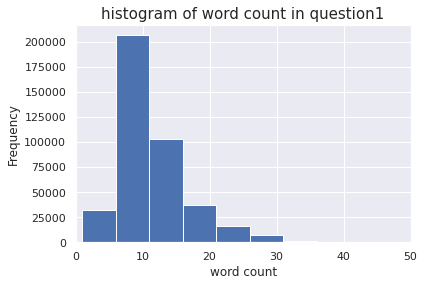

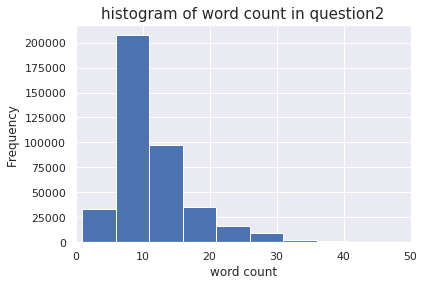

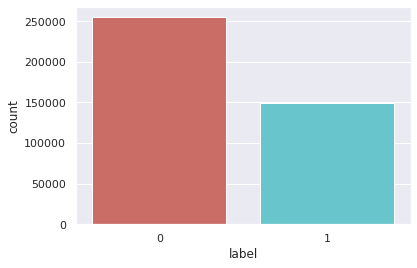

In [0]:
#Histogram of word count 1 & 2
#distribution of wordcount for question 1 

sns.set()
bin_edges = [0,5,20,25,20,25,30,35,40,45,50]
_ = plt.hist(df['count1'], bins=range(min(df['count1']), max(df['count1']) + 5, 5))
_ = plt.xlabel('word count')
_ = plt.ylabel('Frequency')
plt.title('histogram of word count in question1',fontsize=15)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()

#distribution of wordcount for question 2
sns.set()
bin_edges = [0,5,20,25,20,25,30,35,40,45,50]
_ = plt.hist(df['count2'], bins=range(min(df['count2']), max(df['count2']) + 5, 5))
_ = plt.xlabel('word count')
_ = plt.ylabel('Frequency ')
plt.title('histogram of word count in question2',fontsize=15)
plt.xlim(min(bin_edges), max(bin_edges))

plt.show()

#label count 
sns.countplot(x = 'label', data = df, palette = 'hls')
plt.show()



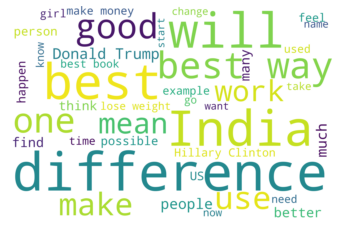

In [0]:
#plot wordcloud for the most frequent words in question1 //this plot will exclude stop_words
from wordcloud import WordCloud 
freq1_letters = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces as word cloud accept string only 
                          str(question1))
wordcloud=WordCloud(background_color='white',mode="RGB", width=3000 , height=2000, max_words= 40, min_font_size=15).generate(freq1_letters) 
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

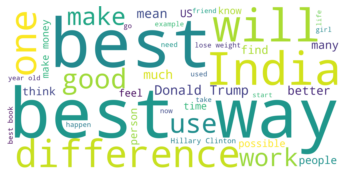

In [0]:
freq2_letters = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces as word cloud accept string only 
                          str(question2))
wordcloud=WordCloud(background_color='white',mode="RGB", width=2000 , height=1000, max_words= 40, min_font_size=15).generate(freq2_letters) 
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [0]:
#change data type in count1 and count2 into integer 
df['count1'] = df['count1'].astype(int)
df['count2'] = df['count2'].astype(int)

**the number of character**

In [0]:
df['char_count1']= df['question1'].str.len() ## this also includes spaces
df['char_count2']= df['question2'].str.len() ## this also includes spaces

**the number of average word length**

In [0]:
#average word length
def avg_word_len(sentence):
  words = sentence.split()
  return round(sum(len(word) for word in words)/len(words))


In [0]:
df['avg_word_len1'] = df['question1'].apply(lambda x: avg_word_len(x))
df['avg_word_len2'] = df['question2'].apply(lambda x: avg_word_len(x))


**the number of stop words**

In [0]:
!pip install stop_words
from stop_words import get_stop_words
stop_words = get_stop_words('en')
stop_words = get_stop_words('english')

df['stopwords_count1'] = df['question1'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df['stopwords_count2'] = df['question2'].apply(lambda x: len([x for x in x.split() if x in stop_words]))


  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32917 sha256=ade5c2713cce92f1e8b82a7e55bfe576c8da8d0a8fa8a4c027435c27203eb7cf
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


**get the common words between question1 and question2**

In [0]:
#get the number of common words 
def common_words(x, y):
    common_word = []
    for i in range(len(x)):
        common_ratio = difflib.SequenceMatcher(None, x[i], y[i]).ratio()
        common_word.append(common_ratio)
    return common_word

df['common_words'] = common_words(question1, question2)

**get the number of unique words**

In [0]:
# get the number of unique words 
def unique_words(x, y):
    unique_word_list = []
    unique_word_cnt = []
    for i in range(len(x)):
        intersection_set = set.intersection(*[set(x[i]), set(y[i])]) #intersection between question1 and question2
        union_set = set.union(*[set(x[i]), set(y[i])]) #union between question1 and question2
        unique_words = union_set - intersection_set #unique words 
        unique_word_list.append(unique_words) #get the unique words list 
        unique_word_cnt.append(len(unique_words)) #get the link of unique words                
    return unique_word_cnt

df['unique_word_cnt'] = unique_words(question1, question2)

## Text Pre-processing 
- Remove questions with less than 8/9 characters <br />
- Drop questions with more than 50 words <br />
- Convert to lower case: will prevent having multiple copies of the same word <br />
- Remove some of the common words <br />
- Remove shortcuts <br />
- Remove puctuations or any other symbols in order to not consider puctuations as words <br />
- Remove stop words <br />
- Remove Numbers <br />
- Remove invalid questions <br />


In [0]:
#remove questions from question 1 that have less than 9 characters  
df_clean = df[df['char_count1']!=9]
#remove questions from question 2 that have less than 8 characters  
df_clean = df[df['char_count2']!=8]

In [0]:
#remove questions with more than 50 words 
df = df[df['count2']< 50]
df = df[df['count1']< 50]


In [0]:
df.shape

(403285, 16)

In [0]:
#convert all the data frame to lower case 
df_clean = df.apply(lambda x: x.astype(str).str.lower())

In [0]:
#remove common words //in this case I decided to remove the top 50 common words
freq1 = list(freq1.index)
freq2 = list(freq2.index)
df_clean['question1'] = df_clean['question1'].apply(lambda x :" ".join(x for x in x.split()if x not in freq1))
df_clean['question2'] = df_clean['question2'].apply(lambda x :" ".join(x for x in x.split()if x not in freq2))

In [0]:
pd.set_option('display.max_colwidth',100)

**Remove Shortcuts** <br />
**Remove Numbers** <br />
**Remove short words**

In [0]:
#replace the shortcuts with words
def clean(s):

    s = re.sub(r"\'ve", " have ", s)
    s = re.sub(r"can't", "cannot ", s)
    s = re.sub(r"n't", " not ", s)
    s = re.sub(r"\'s", " ", s)
    s = re.sub(r"I'm", "I am", s)
    s = re.sub(r" m ", " am ", s)
    s = re.sub(r"\'re", " are ", s)
    s = re.sub(r"\'d", " would ", s)
    s = re.sub(r"\'ll", " will ", s)
    
  #remove numbers
    s = re.sub('[0-9]+', '', s) 

  #remove short words (<3 character)
    s = re.sub(r"\W*\b\w{1,2}\b", "", s)

    return s
df_clean['question1'] = df_clean['question1'].apply(clean)
df_clean['question2'] = df_clean['question2'].apply(clean)

**Remove punctuations**

In [0]:
#remove puctuations 

df_clean['question1'] = df_clean['question1'].str.replace('[^\w\s]','')
df_clean['question2'] = df_clean['question2'].str.replace('[^\w\s]','')

**Remove stop words**

In [0]:
#tokenize the questions and remove stop words 
#remove stop words from question1
df_clean['question1'] = df_clean['question1'].apply(lambda x: [item for item in str.split(x) if item not in stop_words])
#remove stop words from question2 
df_clean['question2'] = df_clean['question2'].apply(lambda x: [item for item in str.split(x) if item not in stop_words])

In [0]:
#remove invalid questions 
for index in invalid_questions:
    df_clean = df_clean[df_clean.id != index]
    question1.pop(index)
    question2.pop(index)

In [0]:
df_clean.tail()

,id,qid1,qid2,question1,question2,label,count1,count2,char_count1,char_count2,avg_word_len1,avg_word_len2,stopwords_count1,stopwords_count2,common_words,unique_word_cnt
404282,404285,433578,379845,"[many, keywords, racket, programming, language, latest, version]","[many, keywords, perl, programming, language, latest, version]",0,14,13,85,79,5,5,6,5,0.8658536585365854,6
404283,404286,18840,155606,"[believe, life, death]","[true, life, death]",1,8,9,41,42,4,4,4,5,0.7228915662650602,6
404284,404287,537928,537929,"[one, coin]",[coin],0,4,3,17,17,4,5,1,1,0.7647058823529411,2
404285,404288,537930,537931,"[approx, annual, cost, living, studying, uic, chicago, indian, student]","[little, hairfall, problem, want, use, hair, styling, product, one, prefer, gel, wax, clay]",0,17,25,94,127,5,4,7,8,0.2986425339366516,5
404286,404289,537932,537933,"[sex, cousin]","[sex, cousin]",0,8,10,37,45,4,4,4,6,0.9024390243902439,2


In [0]:
#convert the text to list 
question1 = list(df_clean['question1'])
question2 = list(df_clean['question2'])
questions = question1 + question2 

## Text Normalization 
**Stemming**: remove the suffices

In [0]:
#stem the words 

st = SnowballStemmer("english")
df_clean['question1'] = df_clean['question1'].apply(lambda x: " ".join([st.stem(word) for word in x]))
df_clean['question2'] = df_clean['question2'].apply(lambda x: " ".join([st.stem(word) for word in x]))

**TF-IDF** <br />
**"term frequency" which is the number of times a word appears in a document** <br>
**TF = (Frequency of the word in the sentence) / (Total number of words in the sentence)** <br>
**IDF: (Total number of sentences (documents))/(Number of sentences (documents) containing the word)**

In [0]:
#encode questions to unicode 
df_clean['question1'] = df_clean['question1'].apply(lambda x: str(x))
df_clean['question2'] = df_clean['question2'].apply(lambda x: str(x))

In [0]:
#convert the text to list 
question1 = list(df_clean['question1'])
question2 = list(df_clean['question2'])
questions = question1 + question2 

In [0]:
#word vectorizer 
tfidf_vectors = TfidfVectorizer(stop_words='english', min_df=10, max_df = 0.5,  sublinear_tf= True,  ngram_range=(1, 2))

In [0]:
tfidf_vectors 

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=10, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=True, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
#create sparse matrix 
tfidf_matrix = tfidf_vectors.fit_transform(questions)


In [0]:
# get features names 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
feature_names = tfidf_vectors.get_feature_names()

In [0]:
feature_names[1:5]

['aaa', 'aaa batteri', 'aachen', 'aadhaar']

## Word Embedding

**en_core_web_md**


In [0]:
#install spacy model en_core_web_md
import spacy.cli
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [0]:
#load en_core_web_lg
import spacy 
nlp = spacy.load("en_core_web_md")   
total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 20000


In [0]:
#build document vectors for question1 
word_vecs1 = [doc.vector for doc in nlp.pipe(df['question1'], n_threads = 50)] #this will give the document vector 
word_vecs1 = np.array(word_vecs1)

In [0]:
 #build document vectors for question2 
word_vecs2 = [doc.vector for doc in nlp.pipe(df['question2'], n_threads = 50)] #this will give the document vector 
word_vecs2 = np.array(word_vecs2)


## Dimensionality Reduction

**PCA** <br />
Unsupervise linear dimensionality reduction technique that takes large data dimension and returns lower data dimension by using clustering. it keeps the components with high variance which means we won't lose valuable features. principal component is the output of converting correlated variables to uncorrelated variables. This will also speed up the machine learning algorithm.

In [0]:
#PCA
from sklearn.decomposition import PCA


Number of components = 50 and explained variance = 0.712155549846141
Number of components = 100 and explained variance = 0.8387980161917792
Number of components = 150 and explained variance = 0.9092510518322969
Number of components = 170 and explained variance = 0.929956695026551
Number of components = 180 and explained variance = 0.9390698929390626


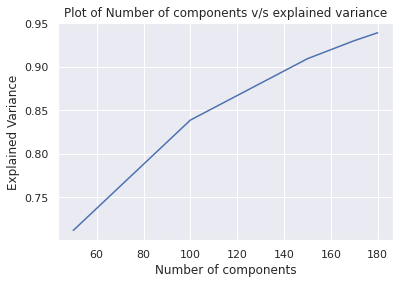

In [0]:
#apply PCA and check the variance 
#the optimal number of components 
n_comp = [50, 100, 150, 170, 180]
explained = [] 
for x in n_comp:
    pca = PCA(n_components=x)
    pca.fit(word_vecs1)
    explained.append(pca.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,pca.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

In [0]:
pca = PCA(n_components=180)
pca1 = pca.fit_transform(word_vecs1)

In [0]:
pca1.shape

(403285, 180)

Number of components = 50 and explained variance = 0.712523806119998
Number of components = 100 and explained variance = 0.8387325988455474
Number of components = 150 and explained variance = 0.9092472442171318
Number of components = 170 and explained variance = 0.9299789838755518


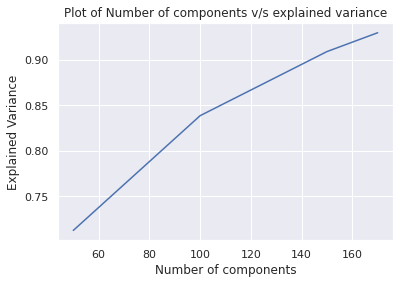

In [0]:
#apply PCA and check the variance 
#the optimal number of components 
n_comp = [50, 100, 150, 170] # list containing different values of components
explained = [] # explained variance ratio for each component of Truncated SVD
for x in n_comp:
    pca = PCA(n_components=x)
    pca.fit(word_vecs1)
    explained.append(pca.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,pca.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

In [0]:
pca = PCA(n_components=180)
pca2 = pca.fit_transform(word_vecs2)

In [0]:
#plotting document vectors 
# plt.plot(pca.explained_variance_ratio_)
for index,vec in enumerate(pca2):
    # print ('%s %s'%(words_label[index],vec))
    if index <100:
      x,y=vec[0],vec[1]
      plt.scatter(x,y)
      plt.annotate(words_label[index],xy=(x,y))
  plt.show()

## Feature Extraction

**Cosine Similarity** <br /> 
Cosine similarity is a metric to measure how similar documents are regardless of their length. it measures the cosine of the angle between two vectors by
looking at their directions (or orientations) without caring about their length 

In [0]:
tfidf_matrix.shape[0]/2

403285.0

In [0]:
 tfidf_matrix1 = tfidf_matrix[:403285]

In [0]:
tfidf_matrix2 = tfidf_matrix[403285:]

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = []
for i in range(403285):
  tfidf_q1 = tfidf_matrix1[i]
  tfidf_q2 = tfidf_matrix2[i]
  cosine_sim.append(cosine_similarity(tfidf_q1, tfidf_q2)[0][0])

In [0]:
len(cosine_sim)

403285

In [0]:
df_clean['cosine_sim_tfidf'] = cosine_sim[0: len(cosine_sim)]


In [0]:
df_clean.tail()

,id,qid1,qid2,question1,question2,label,count1,count2,char_count1,char_count2,avg_word_len1,avg_word_len2,stopwords_count1,stopwords_count2,common_words,unique_word_cnt,cosine_sim_tfidf
404282,404285,433578,379845,mani keyword racket program languag latest version,mani keyword perl program languag latest version,0,14,13,85,79,5,5,6,5,0.8658536585365854,6,0.831743
404283,404286,18840,155606,believ life death,true life death,1,8,9,41,42,4,4,4,5,0.7228915662650602,6,0.486364
404284,404287,537928,537929,one coin,coin,0,4,3,17,17,4,5,1,1,0.7647058823529411,2,1.000000
404285,404288,537930,537931,approx annual cost live studi uic chicago indian student,littl hairfal problem want use hair style product one prefer gel wax clay,0,17,25,94,127,5,4,7,8,0.2986425339366516,5,0.000000
404286,404289,537932,537933,sex cousin,sex cousin,0,8,10,37,45,4,4,4,6,0.9024390243902439,2,1.000000


**Euclidean Distance**


In [0]:
from sklearn.metrics.pairwise import euclidean_distances

In [0]:
euc_dist = []
for i in range(403285):
  docvec_q1 = pca1[[i]]
  docvec_q2 = pca2[[i]]
  euc_dist.append(euclidean_distances(docvec_q1, docvec_q2))

In [0]:
euc_dist[0:10]

[array([[1.3536291]], dtype=float32),
 array([[1.5153176]], dtype=float32),
 array([[1.677446]], dtype=float32),
 array([[2.7678545]], dtype=float32),
 array([[2.2789726]], dtype=float32),
 array([[1.6156051]], dtype=float32),
 array([[2.8429945]], dtype=float32),
 array([[1.3621004]], dtype=float32),
 array([[1.7918725]], dtype=float32),
 array([[1.7850274]], dtype=float32)]

In [0]:
#convert to list 
euc_dist = np.concatenate(euc_dist, axis=0 )

In [0]:
df_clean['euc_dist'] = euc_dist

**Jaccard Similarity** 

In [0]:
#jaccard similarity 
#apply jaccard similarity on documents vectors 
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [0]:
jaccard_sim = []
for i in range(403285):
  docvec_q1 = pca1[i]
  docvec_q2 = pca2[i]
  jaccard_sim.append(jaccard_similarity(docvec_q1, docvec_q2))

In [0]:
len(jaccard_sim)

403285

In [0]:
df_clean['jac_sim'] = jaccard_sim

In [0]:
df_clean.head()

,id,qid1,qid2,question1,question2,label,count1,count2,char_count1,char_count2,avg_word_len1,avg_word_len2,stopwords_count1,stopwords_count2,common_words,unique_word_cnt,cosine_sim_tfidf,euc_dist,jac_sim
0,0,1,2,step step guid invest share market india,step step guid invest share market,0,14,12,66,57,4,4,6,5,0.926829268292683,0,0.923270,1.353629,0.0
1,1,3,4,stori kohinoor kohnoor diamond,happen indian govern stole kohinoor kohnoor diamond back,0,8,13,51,88,6,6,3,4,0.6474820143884892,12,0.544641,1.515318,0.0
2,2,5,6,increas speed internet connect use vpn,internet speed increas hack dns,0,14,10,73,59,4,5,5,3,0.45454545454545453,9,0.193333,1.677446,0.0
3,3,7,8,mental lone solv,find remaind mathmath divid,0,11,9,50,65,4,6,2,4,0.06956521739130435,19,0.000000,2.767854,0.0
4,4,9,10,one dissolv water quik sugar salt methan carbon oxid,fish surviv salt water,0,13,7,76,39,5,5,2,2,0.3652173913043478,9,0.235319,2.278973,0.0


In [0]:
#drop columns won't be used in the model 
df_features = df_clean.drop(['id', 'qid1', 'qid2', 'question1', 'question2'], axis=1)

In [0]:
df_features.dtypes

label                object
count1               object
count2               object
char_count1          object
char_count2          object
avg_word_len1        object
avg_word_len2        object
stopwords_count1     object
stopwords_count2     object
common_words         object
unique_word_cnt      object
cosine_sim_tfidf    float64
euc_dist            float32
jac_sim             float64
dtype: object

In [0]:
#convert to the right data type  
df_features['count1'] = df_features['count1'].astype(int)
df_features['count2'] = df_features['count2'].astype(int)
df_features['char_count1'] = df_features['char_count1'].astype(int)
df_features['char_count2'] = df_features['char_count2'].astype(int)
df_features['avg_word_len1'] = df_features['avg_word_len1'].astype(int)
df_features['avg_word_len2'] = df_features['avg_word_len2'].astype(int)
df_features['stopwords_count1'] = df_features['stopwords_count1'].astype(int)
df_features['stopwords_count2'] = df_features['stopwords_count2'].astype(int)
df_features['label'] = df_features['label'].map({'0':False, '1':True})
df_features['common_words'] = df_features['common_words'].astype(float)
df_features['unique_word_cnt'] = df_features['unique_word_cnt'].astype(float)

**Plot correlation matrix**

[Text(0.5, 0, 'label'),
 Text(1.5, 0, 'count1'),
 Text(2.5, 0, 'count2'),
 Text(3.5, 0, 'char_count1'),
 Text(4.5, 0, 'char_count2'),
 Text(5.5, 0, 'avg_word_len1'),
 Text(6.5, 0, 'avg_word_len2'),
 Text(7.5, 0, 'stopwords_count1'),
 Text(8.5, 0, 'stopwords_count2'),
 Text(9.5, 0, 'common_words'),
 Text(10.5, 0, 'unique_word_cnt'),
 Text(11.5, 0, 'cosine_sim_tfidf'),
 Text(12.5, 0, 'euc_dist'),
 Text(13.5, 0, 'jac_sim')]

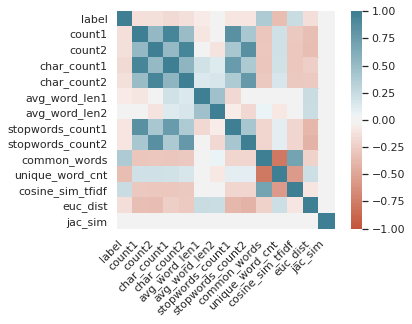

In [0]:
# calculate the correlation matrix
#spearman for numeric data, no assumption on the normality of the data distribution 

corr = df_features.corr(method="spearman")

#plot heat map
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [0]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,label,count1,count2,char_count1,char_count2,avg_word_len1,avg_word_len2,stopwords_count1,stopwords_count2,common_words,unique_word_cnt,cosine_sim_tfidf,euc_dist,jac_sim
label,1.00,-0.14,-0.13,-0.16,-0.13,-0.07,-0.01,-0.11,-0.11,0.38,-0.35,0.25,-0.14,0.00
count1,-0.14,1.00,0.52,0.94,0.50,-0.10,-0.03,0.84,0.41,-0.29,0.20,-0.28,-0.33,-0.00
count2,-0.13,0.52,1.00,0.51,0.94,-0.01,-0.11,0.41,0.85,-0.29,0.20,-0.28,-0.35,-0.00
char_count1,-0.16,0.94,0.51,1.00,0.55,0.19,0.13,0.76,0.39,-0.30,0.19,-0.29,-0.24,-0.00
char_count2,-0.13,0.50,0.94,0.55,1.00,0.14,0.17,0.39,0.78,-0.27,0.17,-0.28,-0.27,-0.00
avg_word_len1,-0.07,-0.10,-0.01,0.19,0.14,1.00,0.46,-0.18,-0.03,-0.01,-0.03,-0.02,0.25,-0.00
avg_word_len2,-0.01,-0.03,-0.11,0.13,0.17,0.46,1.00,-0.05,-0.18,0.05,-0.09,0.02,0.23,-0.00
stopwords_count1,-0.11,0.84,0.41,0.76,0.39,-0.18,-0.05,1.00,0.43,-0.19,0.09,-0.19,-0.39,-0.00
stopwords_count2,-0.11,0.41,0.85,0.39,0.78,-0.03,-0.18,0.43,1.00,-0.19,0.09,-0.20,-0.40,0.00
common_words,0.38,-0.29,-0.29,-0.30,-0.27,-0.01,0.05,-0.19,-0.19,1.00,-0.77,0.70,-0.22,-0.00


## Train Test Split

In [0]:
#separate the features
x = df_features.drop(['label'], axis= 1)

#separate the label
y = df_features['label']

#train test split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1001)

Number of components = 1 and explained variance = 0.7372965025511079
Number of components = 2 and explained variance = 0.9851323385826987
Number of components = 3 and explained variance = 0.9943688887061499
Number of components = 4 and explained variance = 0.9974445439181047
Number of components = 5 and explained variance = 0.9986708996557563
Number of components = 8 and explained variance = 0.999824508469232


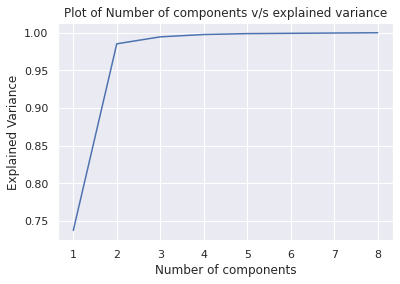

In [0]:
#apply PCA and check the variance 
#the optimal number of components 
n_comp = [1,2, 3, 4,5,8]
explained = [] 
for x in n_comp:
    pca = PCA(n_components=x)
    pca.fit(xtrain)
    explained.append(pca.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,pca.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

Optimal number of components is 5

In [0]:
pca = PCA(n_components=5)
xtrain_pca = pd.DataFrame(pca.fit_transform(xtrain))
xtest_pca = pd.DataFrame(pca.fit_transform(xtest))

In [0]:
df_clean.head()

,id,qid1,qid2,question1,question2,label,count1,count2,char_count1,char_count2,avg_word_len1,avg_word_len2,stopwords_count1,stopwords_count2,common_words,unique_word_cnt,cosine_sim_tfidf,euc_dist,jac_sim
0,0,1,2,step step guid invest share market india,step step guid invest share market,0,14,12,66,57,4,4,6,5,0.926829268292683,0,0.923270,1.353629,0.0
1,1,3,4,stori kohinoor kohnoor diamond,happen indian govern stole kohinoor kohnoor diamond back,0,8,13,51,88,6,6,3,4,0.6474820143884892,12,0.544641,1.515318,0.0
2,2,5,6,increas speed internet connect use vpn,internet speed increas hack dns,0,14,10,73,59,4,5,5,3,0.45454545454545453,9,0.193333,1.677446,0.0
3,3,7,8,mental lone solv,find remaind mathmath divid,0,11,9,50,65,4,6,2,4,0.06956521739130435,19,0.000000,2.767854,0.0
4,4,9,10,one dissolv water quik sugar salt methan carbon oxid,fish surviv salt water,0,13,7,76,39,5,5,2,2,0.3652173913043478,9,0.235319,2.278973,0.0


## Modeling

##Random Forest

- no hyperparameter tuning <br />
- no imbalane treatment

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xtrain, ytrain)

#prediction 
y_pred=clf.predict(xtest)

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.7376473310961599


##Naive Bayes

- no hyperparameter tuning <br />
- no imbalane treatment

In [0]:
# import the package
from sklearn.naive_bayes import GaussianNB

# instantiate the model (using the default parameters)
nb = GaussianNB()

# fit the model with data
nb.fit(xtrain, ytrain)

#prediction
y_pred=nb.predict(xtest)

In [0]:
# evaluate the training model with cross validation 
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
results = cross_val_score(nb , xtrain, ytrain, cv=kfold)
results

array([0.64109104, 0.64576691, 0.64675877, 0.64119731, 0.64279136,
       0.64325186, 0.63970953, 0.63758413, 0.64155154, 0.64210564])

## XGBoost


- with hyperparameter tuning <br />
- with imbalane treatment

In [0]:
#import xgboost 
import xgboost as xgb
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

In [0]:
#define the model 
xgb_model = xgb.XGBClassifier(objective='binary:hinge', learning_rate= 0.1,
                max_depth= 5, alpha1 = 0, scale_pos_weight=6)

binary:hinge: hinge loss for binary classification. This makes predictions of 0 or 1, rather than producing probabilities.


In [0]:
#hyper parameter optimization 
#this is initial params in order to find the best one 
params = { 'learning_rate' :[0.1, 0.3, 0.4, 0.5],
        'min_child_weight': [1, 5, 10],
        'gamma': [1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0], 
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [8, 10, 12], 
        'n_estimators': [50, 100, 150]
        }


In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [0]:
ytrain = ytrain.astype(int)
ytrain


21716     1
245748    0
394597    0
197850    0
74544     0
         ..
65211     1
115278    0
210637    0
52244     0
343748    0
Name: label, Length: 282299, dtype: int64

## Hyperparameter Tuning 
choose the parameter that fit the data the best. <br />
Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model.

a slight variation in the K Fold cross validation technique is made, such that each fold contains approximately the same percentage of samples of each target class as the complete set, or in case of prediction problems, the mean response value is approximately equal in all the folds. This variation is also known as Stratified K Fold.

In [0]:
folds = 10
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
  

In [0]:
random_search = RandomizedSearchCV(xgb_model, params, n_iter=param_comb, scoring='roc_auc', n_jobs=1, cv=skf.split(xtrain, ytrain), verbose=3, random_state=1001 )
random_search


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f6cb4a489e8>,
                   error_score=nan,
                   estimator=XGBClassifier(alpha1=0, base_score=0.5,
                                           booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=5, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='bi...
                   iid='deprecated', n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [1, 1.5, 2, 5],
 

In [0]:
#fit the train set 
random_search.fit(xtrain, ytrain)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.721, total=  31.8s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.8s remaining:    0.0s


[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.729, total=  31.7s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.722, total=  32.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.725, total=  31.6s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.729, total=  31.5s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.732, total=  31.6s
[CV] subsample=0.6, n_estimators=5

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 55.0min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f6cb4a489e8>,
                   error_score=nan,
                   estimator=XGBClassifier(alpha1=0, base_score=0.5,
                                           booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=5, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='bi...
                   iid='deprecated', n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [1, 1.5, 2, 5],
 

In [0]:
#get the best estimator 
random_search.best_estimator_

#these are the best parameter to use in our xgboost model 

XGBClassifier(alpha1=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1.5,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [0]:
#get the score of the best auc
random_search.best_score_

0.7308768328532176

In [0]:
random_search.best_params_

{'colsample_bytree': 1.0,
 'gamma': 1.5,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 50,
 'subsample': 0.8}

In [0]:
best_estimate = random_search.best_estimator_

In [0]:
#best parameters for the classifier model 
xgboost_model = best_estimate

In [0]:
# evaluate the training model with cross validation 
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
results = cross_val_score(xgboost_model , xtrain, ytrain, cv=kfold)

In [0]:
#the average accuracy score for 10 models 
results.mean()

0.7273989588993123

In [0]:
xgboost_model.fit(xtrain, ytrain)

XGBClassifier(alpha1=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1.5,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:hinge', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, seed=None,
              silent=None, subsample=0.8, verbosity=1)

## Evaluating the model 


In [0]:
y_pred = xgboost_model.predict(xtest)

In [0]:
#evaluate the model accuracy on the test set 
from sklearn import metrics
print(metrics.accuracy_score(ytest, y_pred)) 

0.7221331393714975


In [0]:
#evaluate the model using roc-auc
print(metrics.roc_auc_score(ytest, y_pred))

0.7264802294278234


In [0]:
#confusion matrix
print(metrics.confusion_matrix(ytest, y_pred))

[[54169 22141]
 [11477 33199]]


In [0]:
confusion = metrics.confusion_matrix(ytest, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [0]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(ytest, y_pred))

0.27786686062850247
0.2778668606285025


In [0]:
sensitivity = TP / float(FN + TP)
print(sensitivity)

0.7431059181663533


In [0]:
specificity = TN / (TN + FP)

print(specificity)

0.7098545406892937


In [0]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.29014545931070634
0.29014545931070634


In [0]:
precision = TP / float(TP + FP)

print(precision)

0.5999096494398265


In [0]:
 #validation curve 
from yellowbrick.model_selection import LearningCurve

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
from sklearn.model_selection import ShuffleSplit    
from sklearn.model_selection import learning_curve

In [0]:
cv = ShuffleSplit(n_splits=10, test_size=0.2)
train_sizes = [1000, 3000, 5000, 10000, 100000]


## Learning Curves for all model with time effetiency

In [0]:
 #train sizes as shown below 
 train_sizes=np.linspace(.1, 1.0, 5)
 train_sizes

In [0]:
x

##Using Accuracy

In [0]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes = np.linspace(.1, 1.0, 5)):
  if axes is None:
    _, axes = plt.subplots(1, 3, figsize=(20, 5))
  axes[0].set_title(title)
  if ylim is not None:
    axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True, verbose= 3, shuffle=True)
    train_scores_mean = np.mean(train_scores, axis=1) #mean scrore for the train sizes
    train_scores_std = np.std(train_scores, axis=1) #standard deviation for the train sizes
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[0].legend(loc="best") #loc is the location of the legend // The string 'best' places the legend at the location, among the nine locations defined so far, with the minimum overlap with other drawn artists

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    #plot fit_times vs. score 
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    
    return plt

#plot 3 rows 3 columns 
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

#10-fold cross validation 
#naive bayes
title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0) # score curves, each time with 30% data randomly selected as a validation set
estimator = nb
plot_learning_curve(estimator, title, x, y, cv=cv, axes=axes[:, 0], n_jobs=1, ylim=(0.6, 1.01))

#random forest
title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = clf
plot_learning_curve(estimator, title, x, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=1)

#XGBoost
title = "Learning Curves (XGBoost)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = xgboost_model
plot_learning_curve(estimator, title, x, y, axes=axes[:, 2], ylim=(0.7, 1.01), cv=cv, n_jobs=1)
plt.show()


## Log Loss

In [0]:
results = []
kfold = model_selection.KFold(n_splits=10, random_state=1001)
cv_results = model_selection.cross_val_score(nb, xtest, ytest, cv=kfold, scoring="neg_log_loss")
results.append(cv_results)
mean_nb = cv_results.mean()
std_nb = cv_results.std()


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
kfold = model_selection.KFold(n_splits=10, random_state=1001)
cv_results = model_selection.cross_val_score(clf, xtest, ytest, cv=kfold, scoring="neg_log_loss")
results.append(cv_results)
mean_rf = cv_results.mean()
std_rf = cv_results.std()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
kfold = model_selection.KFold(n_splits=10, random_state=1001)
cv_results = model_selection.cross_val_score(clf, xtest, ytest, cv=kfold, scoring="neg_log_loss")
results.append(cv_results)
mean_xgboost = cv_results.mean()
std_xgboost = cv_results.std()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
results

[array([-1.13104481, -1.11789319, -1.10739905, -1.11412287, -1.11092879,
        -1.14131315, -1.15787875, -1.15231431, -1.16684772, -1.1652355 ]),
 array([-0.56856941, -0.5849172 , -0.59650065, -0.57455216, -0.55688522,
        -0.59489258, -0.58364735, -0.60692988, -0.54541062, -0.60131313]),
 array([-0.56814395, -0.54387733, -0.58040724, -0.56344154, -0.57329602,
        -0.57228651, -0.56025672, -0.59304963, -0.56714181, -0.59380748])]

In [0]:
names = ['Naive Bayes', 'Random Forest', 'XGBoost']


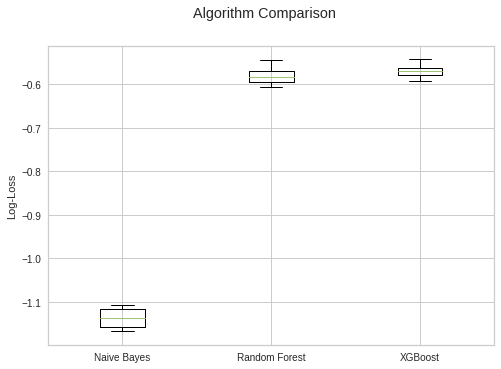

In [0]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel("Log-Loss")
plt.show()